In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('retail_price.csv')

In [4]:
df['month_year'] = pd.to_datetime(df['month_year']).dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [5]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


i haven't been able to figure out what the 's' variable stands for so i'll be dropping it

#### Let's  group the data in categories and assess the distribution:

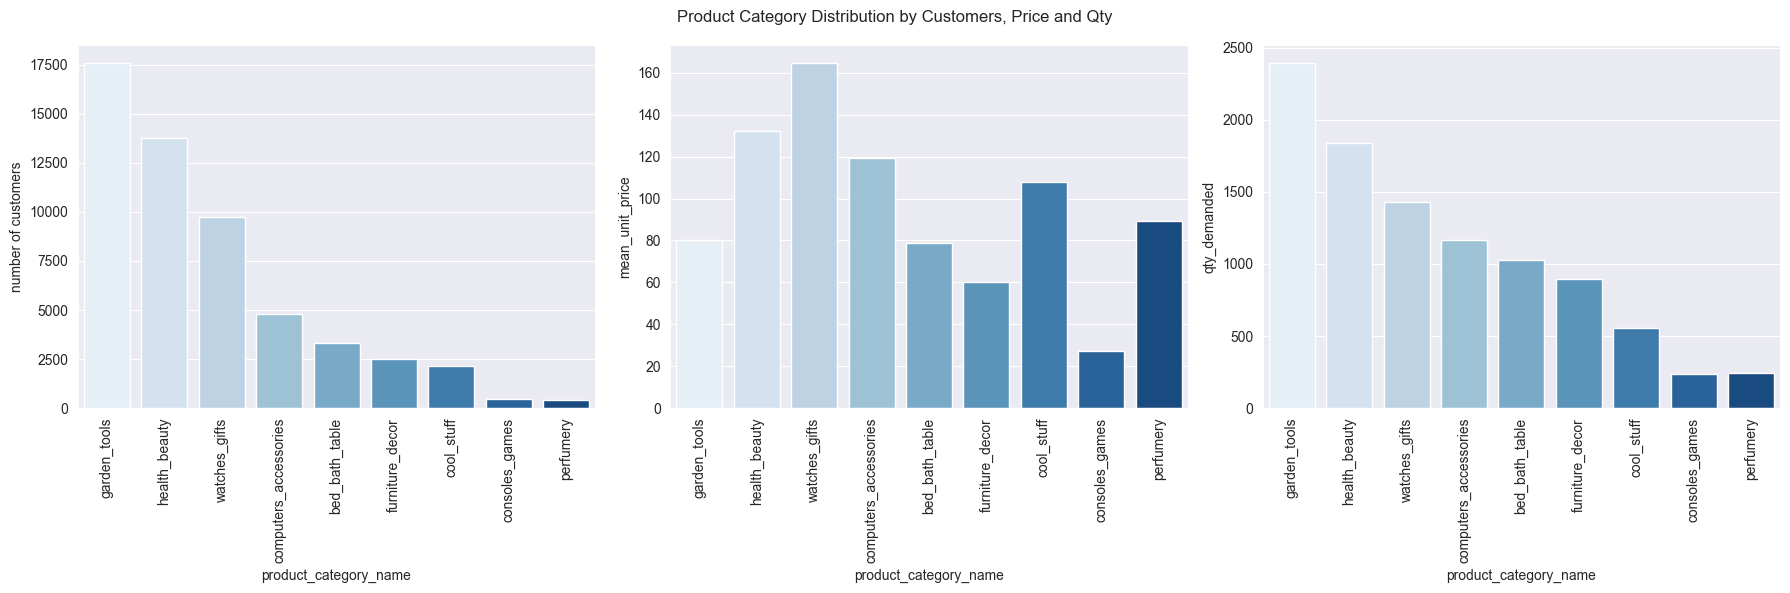

In [6]:
prod_category_df = df.groupby('product_category_name').agg({'customers':'sum', 'unit_price': 'mean', 'qty': 'sum'}).sort_values(by='customers', ascending=False).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(['customers', 'unit_price', 'qty']):
    sns.barplot(prod_category_df, x='product_category_name', y=col, ax=axes[i], palette="Blues")
    axes[i].set_ylabel(['number of customers', 'mean_unit_price', 'qty_demanded'][i])
    axes[i].tick_params(axis='x', rotation=90)
fig.suptitle('Product Category Distribution by Customers, Price and Qty')
plt.tight_layout()
plt.show()

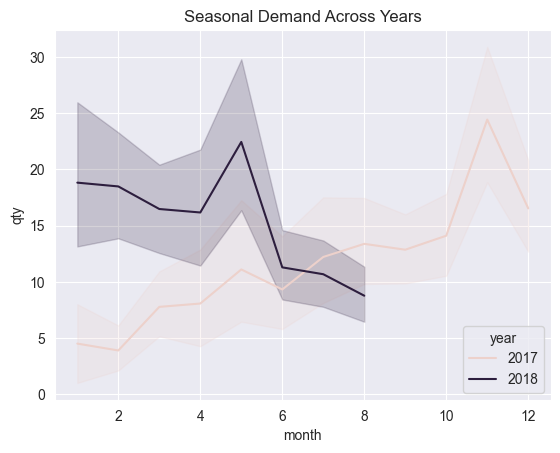

In [7]:
df_month = df.groupby(['year','month', 's']).agg({'qty':'sum','total_price':'sum'}).reset_index()
sns.lineplot(x='month', y='qty', hue='year', data=df_month,)
plt.title("Seasonal Demand Across Years")
plt.show()

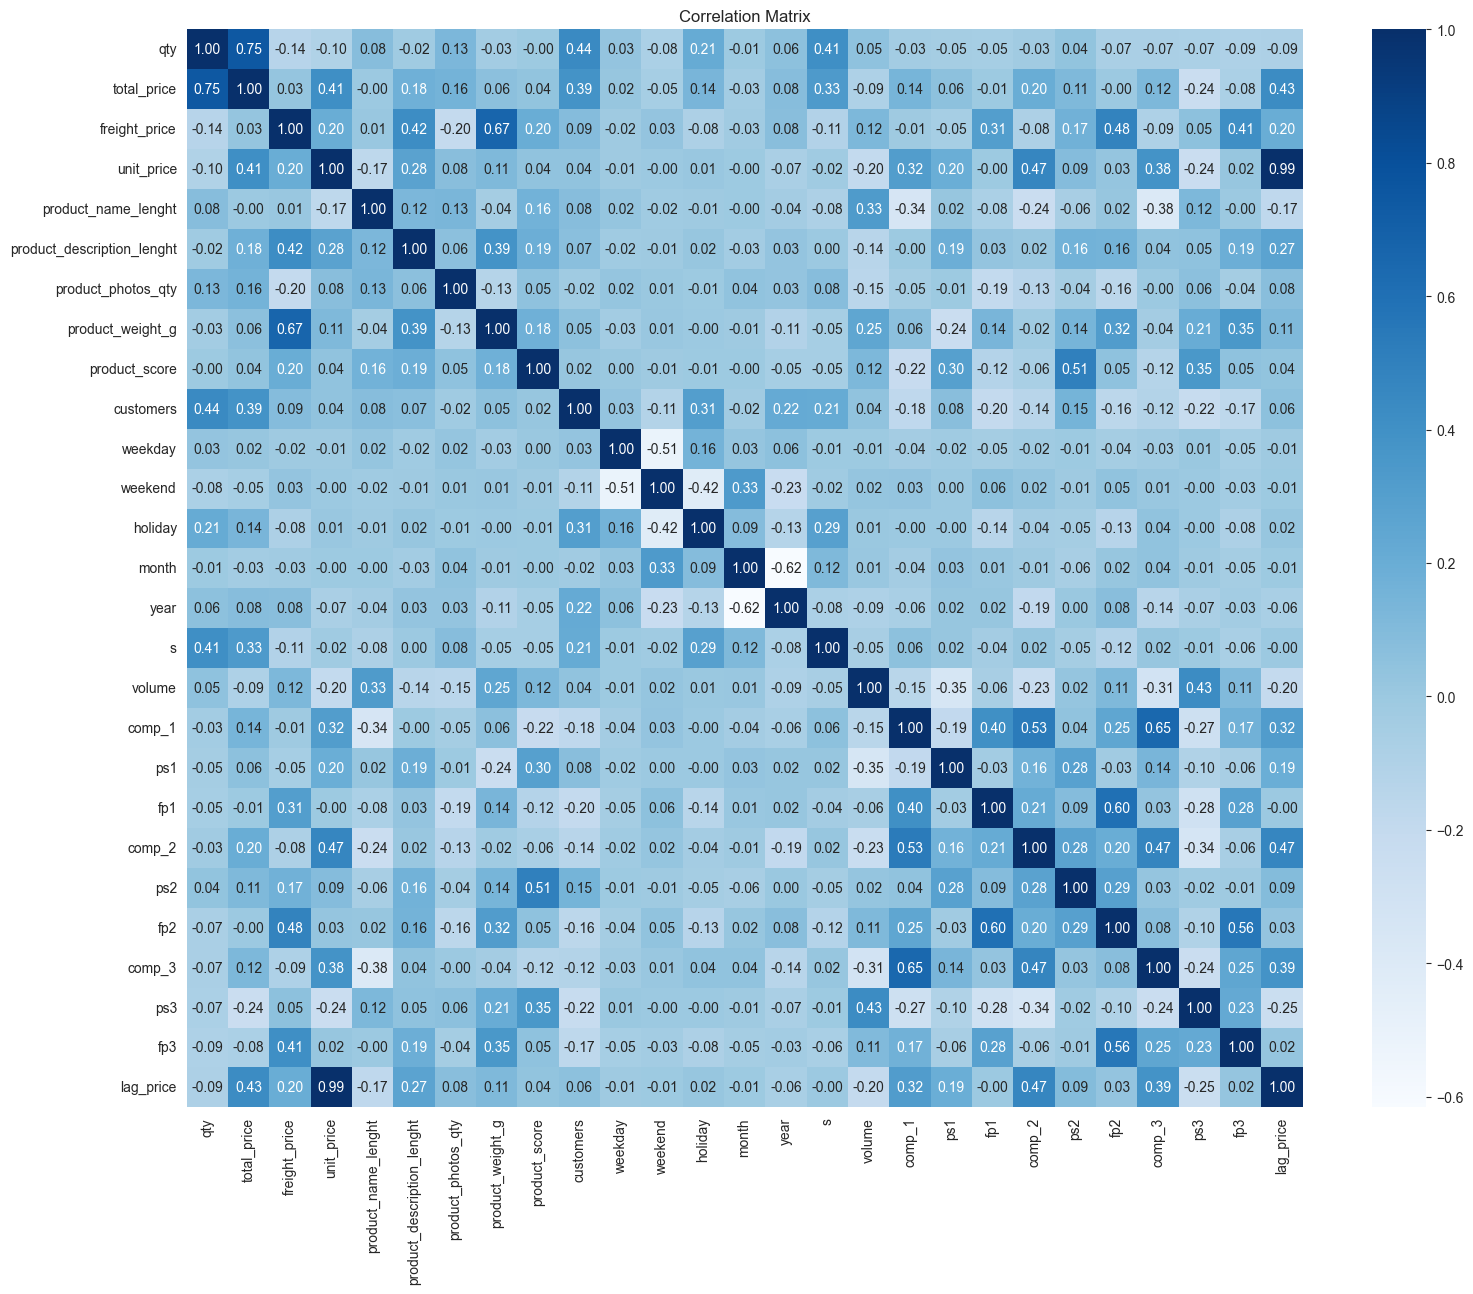

In [8]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(18,14))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

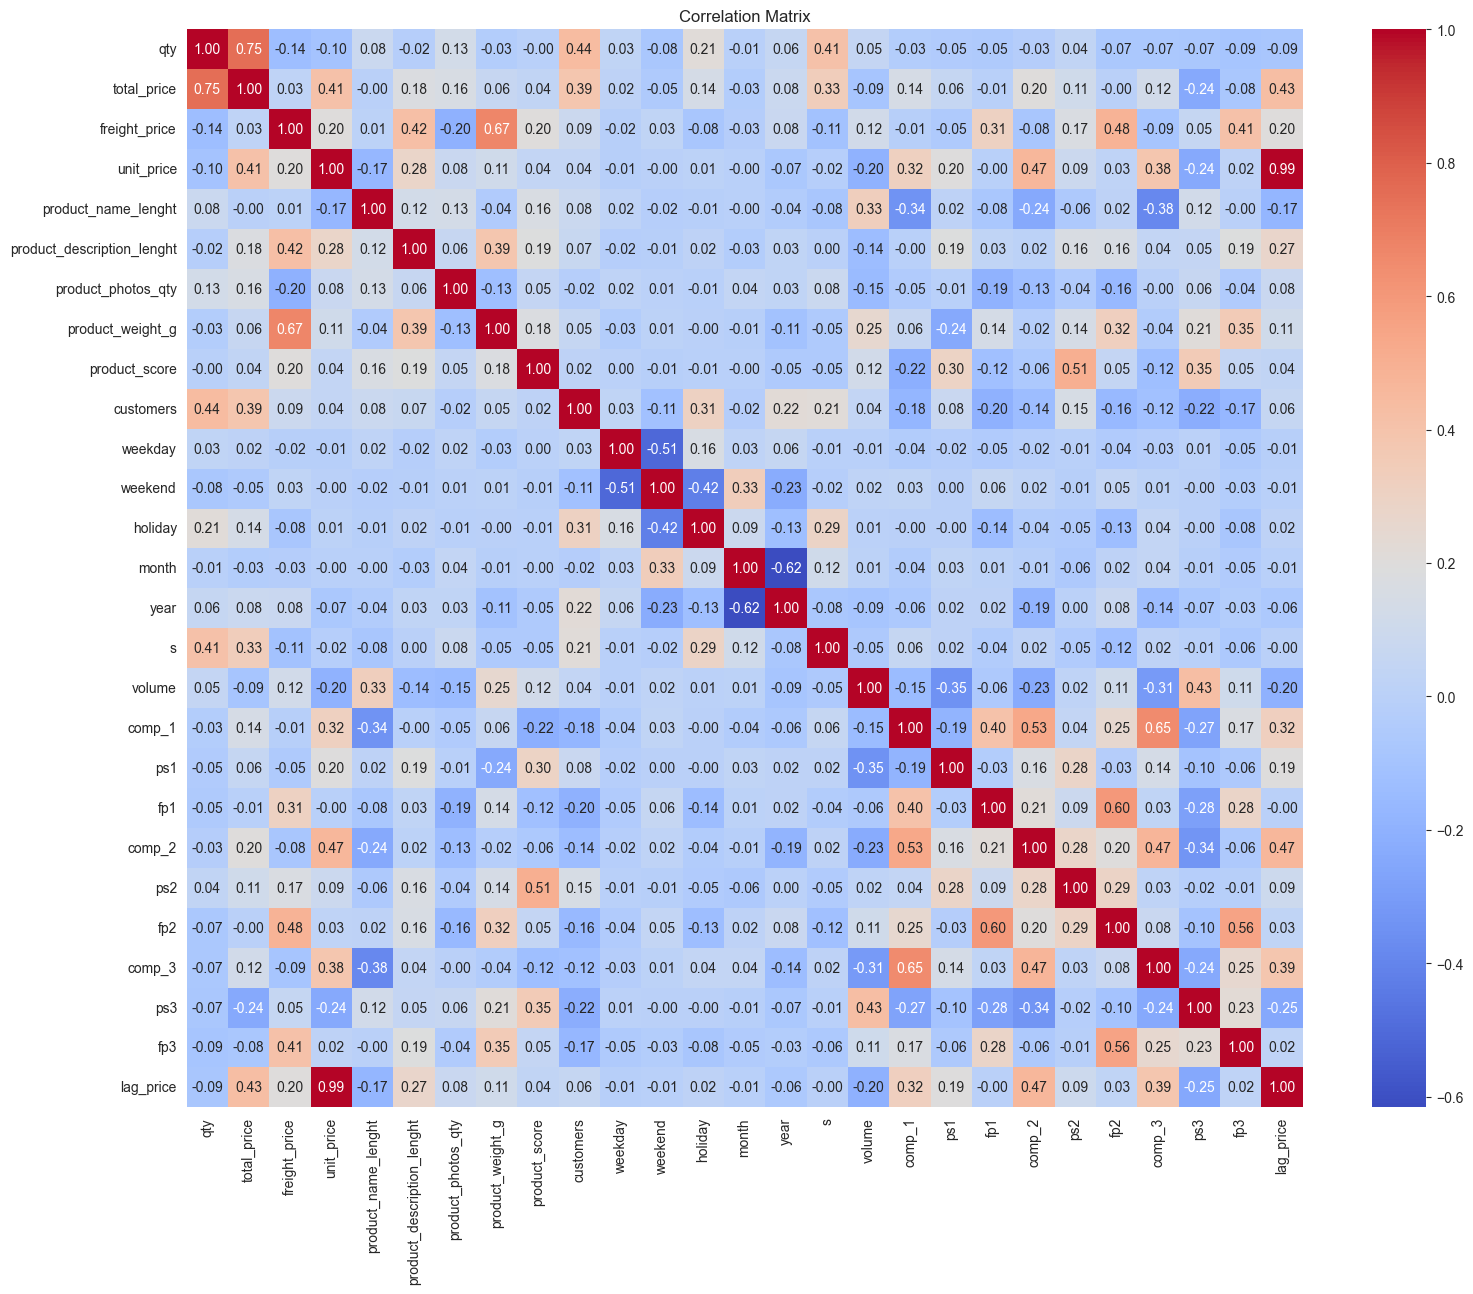

In [9]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(18,14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()